<a href="https://colab.research.google.com/github/kartik04041/superstore-sales-analysis/blob/main/Superstore-sale-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Key Business Metrics ---
Total Revenue:  $ 2252607.41
Total Profit:   $ 107240.56
Profit Margin:    4.76 %
Number of Orders: 4916
Avg Order Value: $ 458.22


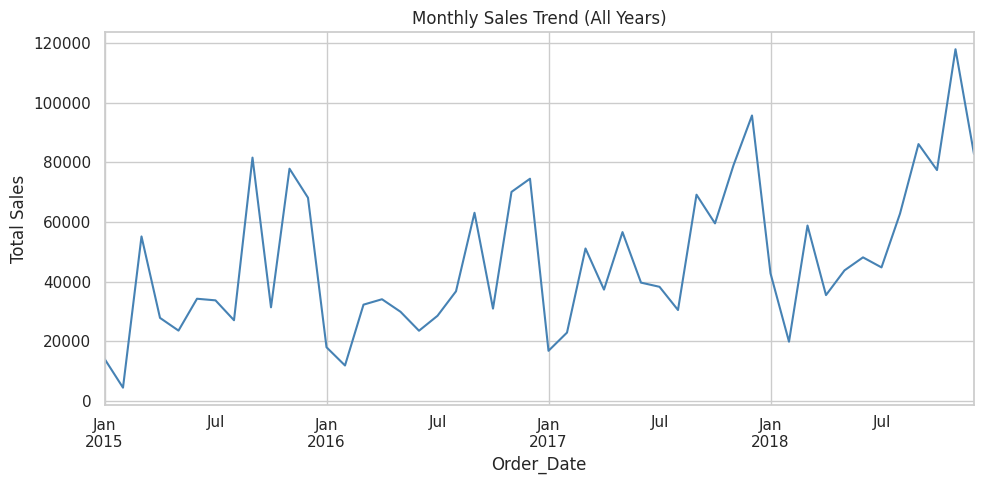

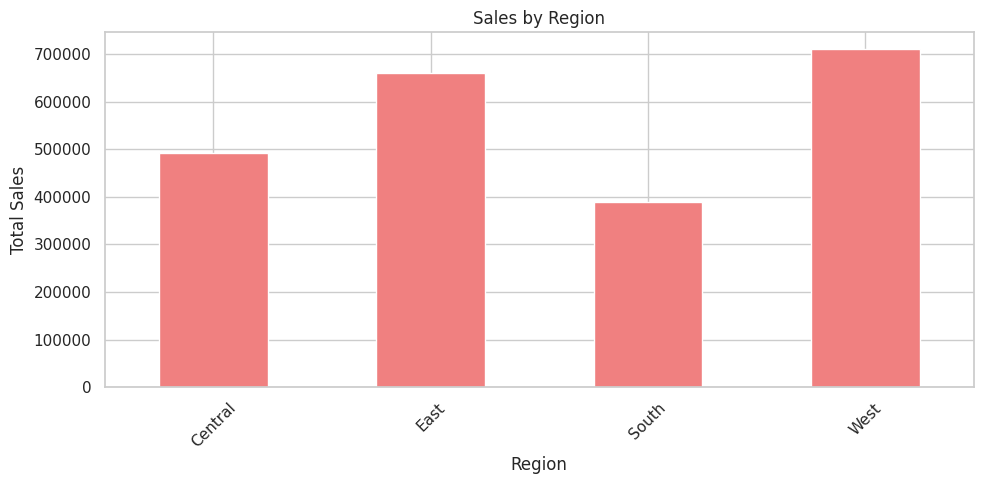

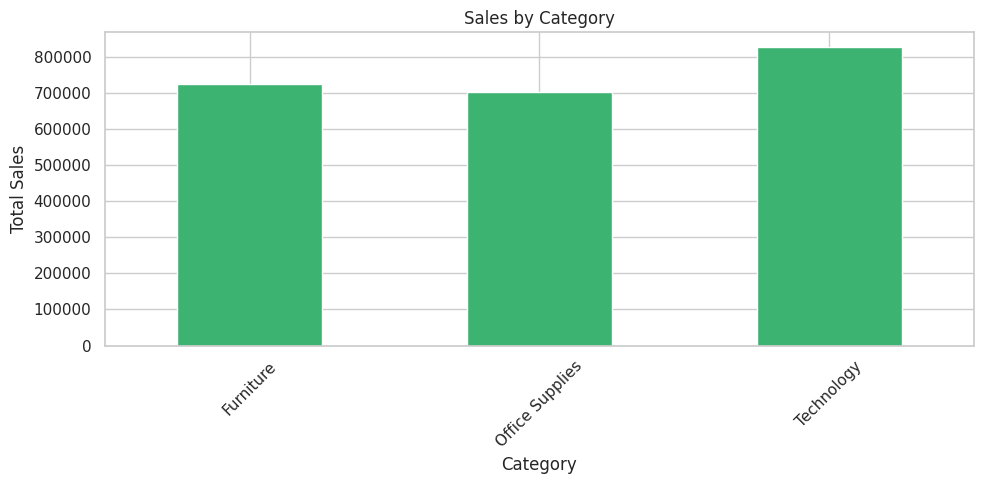

/tmp/ipython-input-1131736196.py:117: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout to prevent labels cutting off


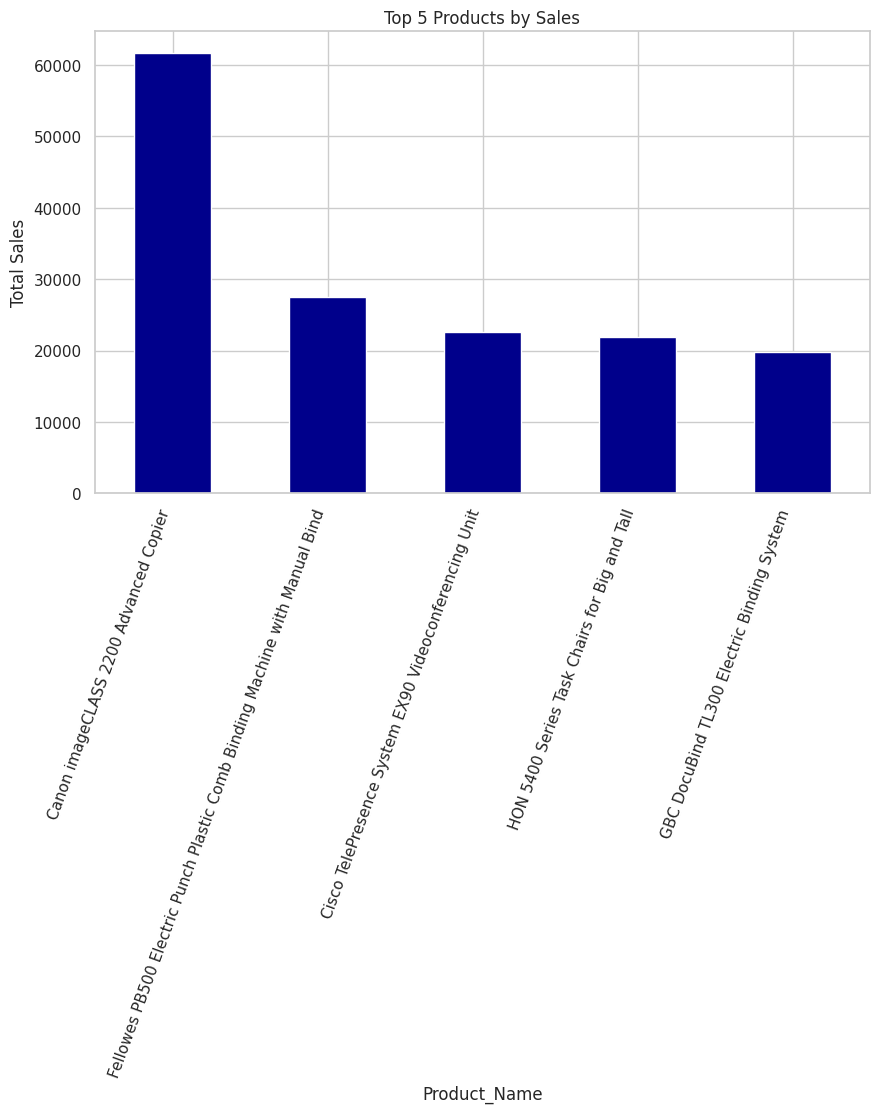

/tmp/ipython-input-1131736196.py:124: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1131736196.py:124: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1131736196.py:124: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


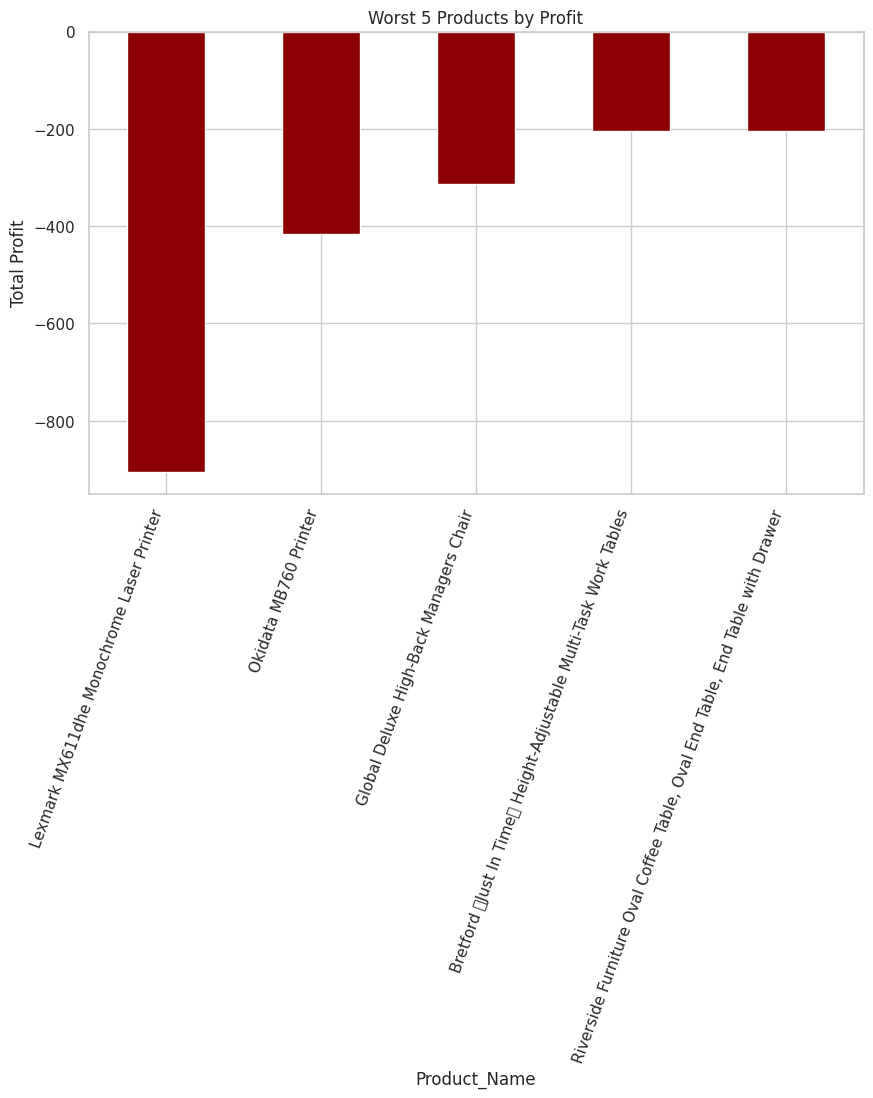

--- Important Insights from Data ---
Top Sales Region: West
Top Sales Category: Technology
Best Selling Product: Canon imageCLASS 2200 Advanced Copier
Product with Lowest Profit: Lexmark MX611dhe Monochrome Laser Printer

------------------------------ Ideas to Help-----------------------------
1. Focus on  more marketing in regions that are not selling then others.
2. Look into products that are losing money or not making enough profit make changes in prices or stop selling them.
3. Give offer or sale on low saling months.
4. Create combo offer of low selling profucts.
5. Spend more advertising money on  popular products



In [ ]:
# =========================================
# SUPERSTORE SALES ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For profit simulation

sns.set(style="whitegrid") # A nice grid for the plots
plt.rcParams["figure.figsize"] = (10,5) # Make plots a good size

# -----------------------------
# 1. LOAD DATA
# -----------------------------
# Loading the main dataset
df = pd.read_csv("/superstore_final_dataset (1).csv", encoding="latin1")

# -----------------------------
# 2. CLEAN & PREPARE
# -----------------------------
# Convert Order Date column to proper datetime format, day first
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Remove duplicate rows if any exist
df.drop_duplicates(inplace=True)

# Remove rows with any missing values
df.dropna(inplace=True)

# Extract Year and Month name from Order_Date for analysis
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month_name()

# Check for 'Profit' column. If missing, create a simulated one.
if 'Profit' not in df.columns:
    # print("Warning: 'Profit' column not found. Simulating profit for visualizations.") # Removed for cleaner output
    # Simulating profit as a percentage of sales, with some randomness.
    # This helps visualize profit trends even without actual profit data.
    df['Profit'] = df['Sales'] * np.random.uniform(low=-0.1, high=0.2, size=len(df))

# Calculate Profit Margin as Profit divided by Sales
df['Profit_Margin'] = df['Profit'] / df['Sales']

# -----------------------------
# 3. KPIs - Key Performance Indicators
# -----------------------------
# Sum up total sales for revenue
revenue = df['Sales'].sum()
# Sum up total profit
profit = df['Profit'].sum()
# Count unique order IDs for total orders
orders = df['Order_ID'].nunique()
# Calculate Average Order Value
aov = revenue / orders
# Calculate overall Profit Margin percentage
margin = (profit / revenue) * 100

print("--- Key Business Metrics ---")
print("Total Revenue:  $", round(revenue,2))
print("Total Profit:   $", round(profit,2))
print("Profit Margin:   ", round(margin,2),"%")
print("Number of Orders:", orders)
print("Avg Order Value: $", round(aov,2))

# -----------------------------
# 4. SALES TREND - Monthly Sales Over Time
# -----------------------------
# Group sales by month-end for a time series
monthly_sales_trend = df.groupby(pd.Grouper(key='Order_Date', freq='ME'))['Sales'].sum()

# Plot the monthly sales trend
monthly_sales_trend.plot(title="Monthly Sales Trend (All Years)", color='steelblue')
plt.ylabel("Total Sales") # Label for the y-axis
plt.tight_layout() # Adjust layout to prevent labels cutting off
plt.show()

# -----------------------------
# 5. REGION PERFORMANCE - Sales by Geographic Region
# -----------------------------
# Group sales and profit by Region
region_performance = df.groupby('Region')[['Sales','Profit']].sum()

# Plot sales for each region
region_performance['Sales'].plot(kind='bar', title="Sales by Region", color='lightcoral')
plt.ylabel("Total Sales")
plt.xticks(rotation=45) # Rotate labels so they don't overlap
plt.tight_layout() # Adjust layout to prevent labels cutting off
plt.show()

# -----------------------------
# 6. CATEGORY PERFORMANCE - Sales by Product Category
# -----------------------------
# Group sales and profit by Product Category
category_performance = df.groupby('Category')[['Sales','Profit']].sum()

# Plot sales for each category
category_performance['Sales'].plot(kind='bar', title="Sales by Category", color='mediumseagreen')
plt.ylabel("Total Sales")
plt.xticks(rotation=45);
plt.tight_layout() # Adjust layout to prevent labels cutting off
plt.show()

# -----------------------------
# 7. TOP & WORST PRODUCTS - By Sales and Profit
# -----------------------------
# Get the top 5 products by total sales
top_5_products_sales = df.groupby('Product_Name')['Sales'].sum().nlargest(5)
# Get the bottom 5 products by total profit (worst performers)
worst_5_products_profit = df.groupby('Product_Name')['Profit'].sum().nsmallest(5)

# Plot top 5 products by sales
plt.figure(figsize=(10,6)) # Increased height for better label visibility
top_5_products_sales.plot(kind='bar', title="Top 5 Products by Sales", color='darkblue')
plt.ylabel("Total Sales")
plt.xticks(rotation=70, ha='right') # Rotate and align labels
plt.tight_layout() # Adjust layout to prevent labels cutting off
plt.show()

plt.figure(figsize=(10,6)) # Increased height for better label visibility
worst_5_products_profit.plot(kind='bar', title="Worst 5 Products by Profit", color='darkred')
plt.ylabel("Total Profit")
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()


# 8. KEY INSIGHTS - Summary of Findings

print("--- Important Insights from Data ---")
print("Top Sales Region:", region_performance['Sales'].idxmax())
print("Top Sales Category:", category_performance['Sales'].idxmax())
print("Best Selling Product:", top_5_products_sales.index[0])
print("Product with Lowest Profit:", worst_5_products_profit.index[0])


# RECOMMENDATIONS - Suggestions for Improvement

print("""
------------------------------ Ideas to Help-----------------------------
1. Focus on  more marketing in regions that are not selling then others.
2. Look into products that are losing money or not making enough profit make changes in prices or stop selling them.
3. Give offer or sale on low saling months.
4. Create combo offer of low selling profucts.
5. Spend more advertising money on  popular products
""")